In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

%matplotlib inline

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('wisc_bc_data-1 (1).csv')

In [5]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
data = data.drop('id', axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [9]:
data_corr = data.corr(method='pearson')

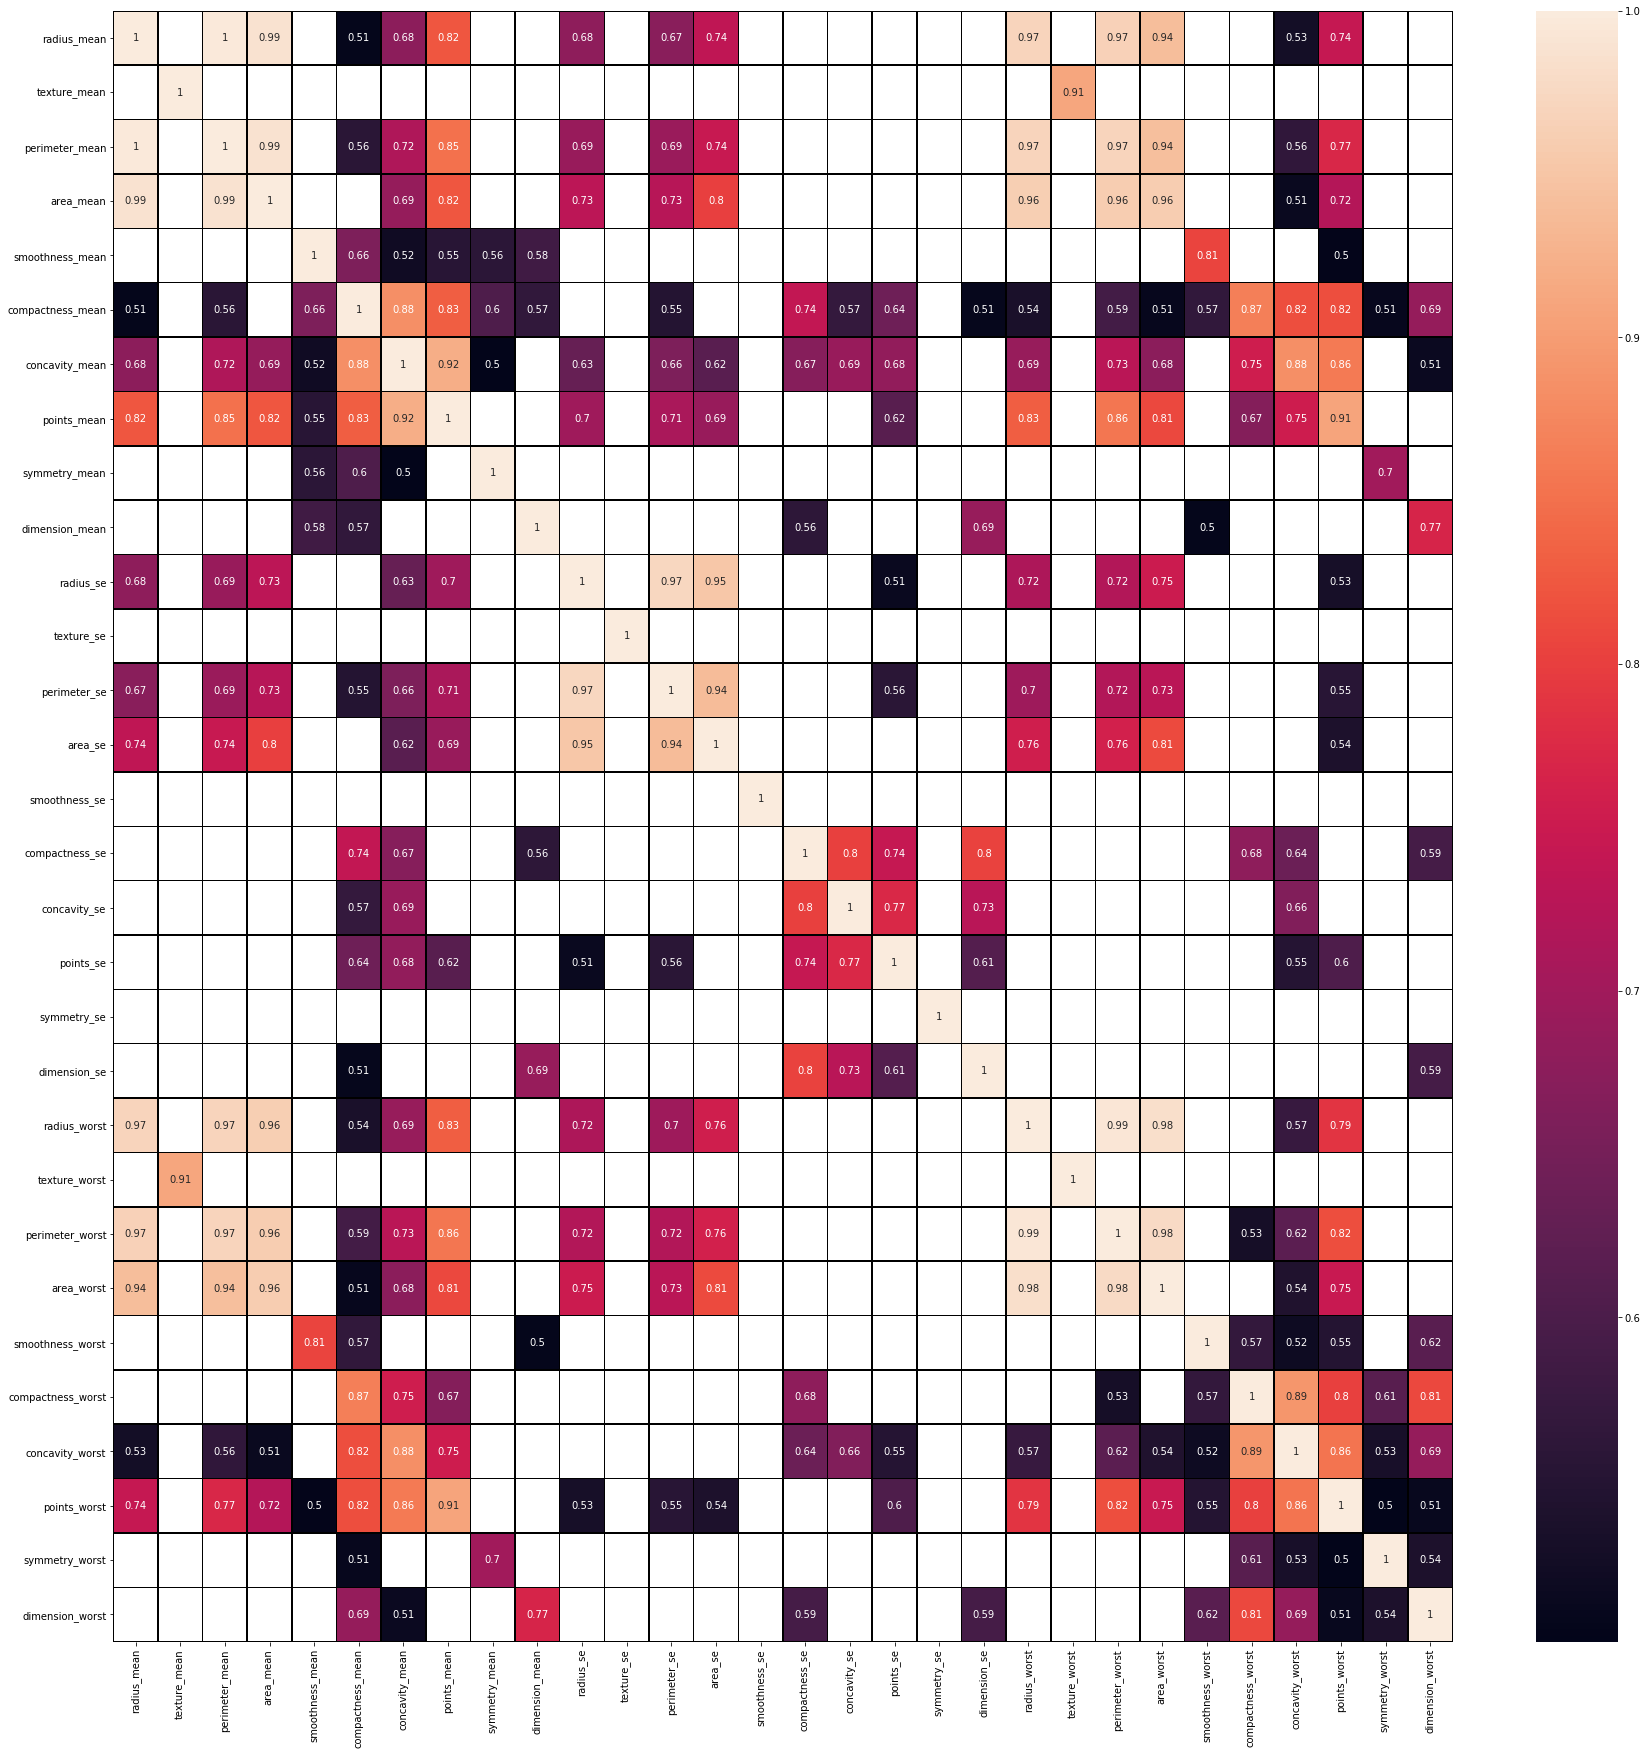

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(data_corr[(data_corr >=0.5) | (data_corr <=-0.5)], annot=True, linewidths=0.5, linecolor="black")

In [29]:
data2 = data.groupby('diagnosis').count()
data2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [30]:
data['diagnosis'] = data.diagnosis.astype('category')

In [31]:
data.dtypes

diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [32]:
#sns.pairplot(data, diag_kind='kde', hue='diagnosis')

In [33]:
target = data['diagnosis']
target.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: category
Categories (2, object): [B, M]

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

le = preprocessing.LabelEncoder()

y = le.fit_transform(target)

In [57]:
X = data.iloc[:, 1:-1]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487


In [59]:
import statsmodels.api as sm

print("\n Variance Inflation Factor")

colnames = X.columns

for i in np.arange(0, len(colnames)):
    xvars = list(colnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(X[yvars], X[xvars])
    res = mod.fit()
    VIF = 1/(1 - res.rsquared)
    print (yvars,round(VIF,3))
    


 Variance Inflation Factor
radius_mean 63158.055
texture_mean 251.047
perimeter_mean 58094.699
area_mean 1280.633
smoothness_mean 389.943
compactness_mean 195.818
concavity_mean 156.58
points_mean 153.603
symmetry_mean 184.242
dimension_mean 338.425
radius_se 233.606
texture_se 24.673
perimeter_se 210.393
area_se 71.912
smoothness_se 26.161
compactness_se 41.436
concavity_se 32.395
points_se 53.675
symmetry_se 36.509
dimension_se 17.516
radius_worst 9433.435
texture_worst 342.985
perimeter_worst 4391.433
area_worst 1131.371
smoothness_worst 372.473
compactness_worst 98.071
concavity_worst 81.453
points_worst 148.188
symmetry_worst 217.402


In [60]:
Xz = X.apply(zscore)
Xz.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.585118,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.180390,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.604031,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.133486,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.767057,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366


In [62]:
import statsmodels.api as sm

print("\n Variance Inflation Factor")

colnames = Xz.columns

for i in np.arange(0, len(colnames)):
    xvars = list(colnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(Xz[yvars], Xz[xvars])
    res = mod.fit()
    VIF = 1/(1 - res.rsquared)
    print (yvars,round(VIF,3))
    


 Variance Inflation Factor
radius_mean 3802.153
texture_mean 11.884
perimeter_mean 3784.55
area_mean 347.63
smoothness_mean 8.12
compactness_mean 48.798
concavity_mean 70.287
points_mean 59.86
symmetry_mean 4.219
dimension_mean 11.106
radius_se 74.537
texture_se 4.205
perimeter_se 70.075
area_se 40.769
smoothness_se 4.027
compactness_se 14.365
concavity_se 15.293
points_se 11.516
symmetry_se 5.086
dimension_se 6.749
radius_worst 782.825
texture_worst 18.568
perimeter_worst 397.614
area_worst 335.425
smoothness_worst 10.816
compactness_worst 27.159
concavity_worst 30.253
points_worst 36.638
symmetry_worst 9.46


In [49]:
NNH = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', algorithm='brute')
NNH1 = KNeighborsClassifier()
def maxmodel(model, X, y, param_grid, cv):
    MODELG = GridSearchCV(model, param_grid, cv=cv)
    MODELN = MODELG.fit(X, y)
    print('Best parameters:', MODELN.best_params_)
    print('Best score:', MODELN.best_score_)
    
param_grid = {'n_neighbors' :np.arange(1,10,1), 'weights' : ('distance', 'uniform'), 'algorithm':('brute','auto','ball_tree','kd_tree')}
maxmodel(NNH1, Xz, y, param_grid, 10)    

Best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.968365553602812


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(Xz, y, test_size=0.3, random_state=42)

In [52]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [56]:
from sklearn.metrics import cohen_kappa_score

pred = NNH.predict(X_test)
print(NNH.score(X_test, y_test))
print('Kppa score is:', cohen_kappa_score(y_test, pred))

0.9766081871345029
Kppa score is: 0.9490312965722801


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[108   2]
 [  2  59]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.97      0.97      0.97        61

   micro avg       0.98      0.98      0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [80]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)


0.9473684210526315

In [54]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ye = le.fit_transform(target)

Xe = Xz

X1_train, X1_test, y1_train, y1_test = train_test_split(Xe, ye, test_size=0.3, random_state=42)


In [55]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X1_train, y1_train)

GNB.score(X1_test, y1_test)

0.9473684210526315

In [56]:
pred = GNB.predict(X1_test)

In [68]:
confusion_matrix(y1_test, pred)

array([[103,   7],
       [  2,  59]], dtype=int64)

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, minmax_scale

X_svc = X
y_svc = y


scale = StandardScaler()
X_svc = scale.fit_transform(X_svc)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_svc, y_svc, test_size = 0.3, random_state=34)

clf = SVC(kernel='rbf', class_weight='balanced')

clf.fit(Xa_train, ya_train)

ya_predict = clf.predict(Xa_test)


print(confusion_matrix(ya_test, ya_predict))

print(classification_report(ya_test, ya_predict))

print(cross_val_score(clf, Xa_test, ya_test))

[[103   3]
 [  2  63]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       106
           1       0.95      0.97      0.96        65

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[0.98275862 0.92982456 1.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

In [115]:
from sklearn.feature_selection import RFE, RFECV

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=5, step=1)
rfe.fit(Xz, y)
ranking = rfe.ranking_

print(ranking)
print(rfe.ranking_)

[13 19 11 16 24  4  5  1 23 25  6  7 17  3 18 14 15 10 20  8  1  1  1  1
  2 21 12 22  9]
[13 19 11 16 24  4  5  1 23 25  6  7 17  3 18 14 15 10 20  8  1  1  1  1
  2 21 12 22  9]
